In [1]:
# 1. Import Necessary Packages
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import cifar10
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16  # or any other CNN architecture
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the pre-trained VGG16 model without the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.summary()  # Display the model architecture

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [3]:
# Freeze all layers in the base model
for layer in base_model.layers:
    layer.trainable = False

In [4]:
# Define the custom model on top of the pre-trained base
model = Sequential([
    base_model,  # Pre-trained base model
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),  # Adding dropout for regularization
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()  # Display the complete model architecture

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,879,041 (56.76 MB)

 Trainable params: 164,353 (642.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [7]:
# Define data directories (specify path as needed)
train_dir = 'C:/Users/Admin/Downloads/LP4/LP4/train'
val_dir = 'C:/Users/Admin/Downloads/LP4/LP4/val'


# Data generators with data augmentation for training and validation sets
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=15, width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, class_mode='binary')
val_generator = val_datagen.flow_from_directory(val_dir, target_size=(224, 224), batch_size=32, class_mode='binary')

Found 286 images belonging to 1 classes.
Found 377 images belonging to 1 classes.


In [8]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)


C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 107s 12s/step - accuracy: 0.5221 - loss: 0.7281 - val_accuracy: 1.0000 - val_loss: 0.3770
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 99s 12s/step - accuracy: 0.9288 - loss: 0.3533 - val_accuracy: 1.0000 - val_loss: 0.1640
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 105s 12s/step - accuracy: 1.0000 - loss: 0.1826 - val_accuracy: 1.0000 - val_loss: 0.0775
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 101s 12s/step - accuracy: 1.0000 - loss: 0.0920 - val_accuracy: 1.0000 - val_loss: 0.0422
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 105s 12s/step - accuracy: 1.0000 - loss: 0.0570 - val_accuracy: 1.0000 - val_loss: 0.0259
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 116s 14s/step - accuracy: 1.0000 - loss: 0.0398 - val_accuracy: 1.0000 - val_loss: 0.0172
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 101s 12s/step - accuracy: 1.0000 - loss: 0.0270 - val_accuracy: 1.0000 - val_loss: 0.0124
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 101s 12s/step - accuracy: 1.0000 - loss: 0.0205 - val_accuracy: 1.0000 - val_loss: 

In [9]:
# Unfreeze the last few layers for fine-tuning
for layer in base_model.layers[-4:]:  # Unfreeze last 4 layers
    layer.trainable = True

# Recompile the model after unfreezing layers
model.compile(optimizer=Adam(learning_rate=0.00001), loss='binary_crossentropy', metrics=['accuracy'])

# Fine-tune the model
history_fine = model.fit(train_generator, validation_data=val_generator, epochs=5)

Epoch 1/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 113s 13s/step - accuracy: 1.0000 - loss: 0.0074 - val_accuracy: 1.0000 - val_loss: 4.9981e-04
Epoch 2/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 109s 13s/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 1.0000 - val_loss: 5.0553e-05
Epoch 3/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 111s 13s/step - accuracy: 1.0000 - loss: 1.8786e-04 - val_accuracy: 1.0000 - val_loss: 1.0690e-05
Epoch 4/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 112s 13s/step - accuracy: 1.0000 - loss: 9.0341e-05 - val_accuracy: 1.0000 - val_loss: 4.0907e-06
Epoch 5/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 111s 13s/step - accuracy: 1.0000 - loss: 5.1317e-05 - val_accuracy: 1.0000 - val_loss: 2.2736e-06


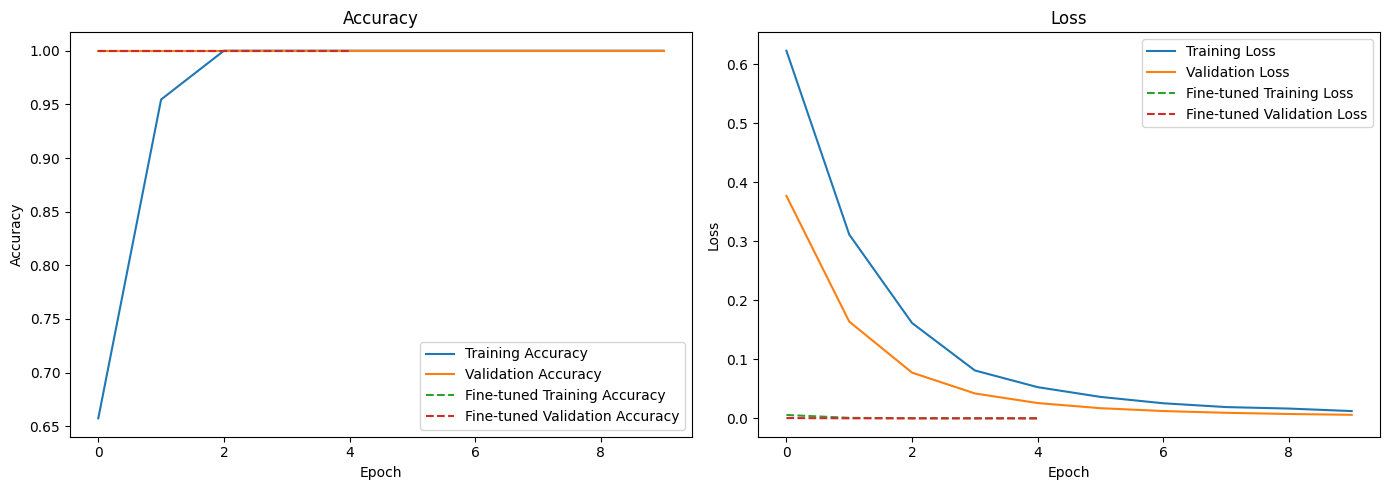

In [10]:
# Plot training history
plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history_fine.history['accuracy'], label='Fine-tuned Training Accuracy', linestyle='--')
plt.plot(history_fine.history['val_accuracy'], label='Fine-tuned Validation Accuracy', linestyle='--')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history_fine.history['loss'], label='Fine-tuned Training Loss', linestyle='--')
plt.plot(history_fine.history['val_loss'], label='Fine-tuned Validation Loss', linestyle='--')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()